# Logistic Regression

In [16]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data

In [2]:
data = pd.read_csv("dataset6.csv")
data.head()

,MPG,GPM,WT,DIS,NC,HP,ACC,ET
0,16.9,5.917,4.360,350,8,155,14.9,1
1,15.5,6.452,4.054,351,8,142,14.3,1
2,19.2,5.208,3.605,267,8,125,15.0,1
3,18.5,5.405,3.940,360,8,150,13.0,1
4,30.0,3.333,2.155,98,4,68,16.5,0


## Model Development and Prediction

In [3]:
X = data.drop("ET", axis=1)
Y = data["ET"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [25]:
model = LogisticRegression()
model.fit(X_train, Y_train)

predictions = model.predict(X_test)

## Confusion Matrix

In [26]:
confusion_matrix = metrics.confusion_matrix(Y_test, predictions)

Text(0.5,257.44,'Predicted label')

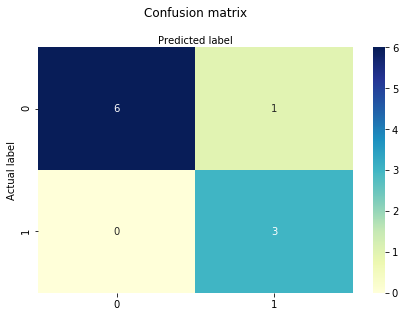

In [27]:
class_names=[0,1] # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [31]:
print "Accuracy =", metrics.accuracy_score(Y_test, predictions)
print "Precision =", metrics.precision_score(Y_test, predictions)
print "Recall =", metrics.recall_score(Y_test, predictions)

Accuracy = 0.9
Precision = 0.75
Recall = 1.0


From the values above, we can say that our model has a good accuracy of 90%.
It makes precise predictions 75% of the time.
It also has a perfect recall, i.e. 100%.

## ROC Curve

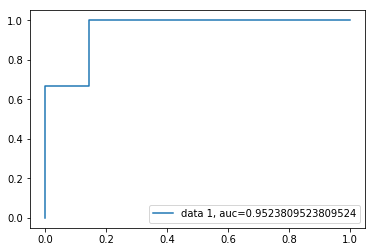

In [32]:
predictions_probability = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  predictions_probability)
auc = metrics.roc_auc_score(Y_test, predictions_probability)
plt.plot(fpr, tpr, label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

The AUC score of 0.95 means that we have a near-perfect classifier.